# TASK 1: EXPLORE  A SMALL  DATASET

    When you do **data mining** (DM), you will need to check for data quality, manipulate data, as well as to build and evaluate models. In this first assignment, the aim is that you get familiar with your chosen DM software. You should learn to use it on a basic level, and carry out elementary DM tasks, so you will be prepared to take on more challenging ones coming to you in the form of subsequent assignments.
    
## TASK 1A: EXPLORATION 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from decimal import Decimal

import spacy
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("./datas/ODI-2022.csv",on_bad_lines='skip',sep=';')
data.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                            --------------  ----- 
 0   Tijdstempel                                                                                                                                                                                       304 non-null    object
 1   What programme are you in?                                                                                                                                                                        304 non-null    object
 2   Ha

In [4]:
data.describe()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,304,304,304,304,304,304,304,304,304,304,304,304,303,304,302,304,304
unique,165,123,3,3,3,3,5,5,295,30,3,77,109,142,177,201,235
top,4-5-2022 12:16:06,AI,yes,0,mu,ja,male,neither,08-05-1998,0,no,10,100,7,23:00,Sun,Food
freq,9,39,185,202,243,158,183,105,3,126,236,22,50,19,21,14,11


In [5]:
data.shape # dimension of data

(304, 17)

In [6]:
data.columns

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')

In [7]:
# Renaming columns names to more readable names
data.columns =['timestamp','programme','ml_course','ir_course','stat_course','db_course',
               'gender','chocolate','birth_date','neighbours','standed_up','stress_level',
               'money','rand_num','time_yesterday','good_day','good_day2']

data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [8]:
data["programme"].value_counts()

AI                           39
Artificial Intelligence      31
Computational Science        23
Business Analytics           14
Computer Science             10
                             ..
Computer science - BDE        1
None                          1
computational science         1
Medical Natural Sciences      1
MSc Computational Science     1
Name: programme, Length: 123, dtype: int64

In [9]:
data.sort_values(by="programme").head(10)

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
117,4-5-2022 12:15:37,AI,yes,0,mu,ja,female,fat,01/01/1998,1,no,0,50,23,3AM,food,being with the people i love
250,4-5-2022 12:16:18,AI,yes,0,mu,nee,male,neither,1989.9.2,4,no,80,70,9,9:00,food,sleep
61,4-5-2022 12:14:12,AI,yes,0,mu,ja,male,fat,19-02-1998,1,yes,20,1000,864687452,Gym,Food,Good coffee
84,4-5-2022 12:14:40,AI,yes,0,mu,nee,male,I have no idea what you are talking about,02/11/1896,5,unknown,1000,0,980000000000000789,00:00,Beer,Beer
34,4-5-2022 12:13:34,AI,no,0,sigma,ja,male,I have no idea what you are talking about,14.05.1996,5,no,70,20,2500,5,Weather,Beer
210,4-5-2022 12:16:03,AI,no,0,mu,nee,female,neither,21'12'1995,4,no,1,0,21,23.34,sunshine,fun stuff on the planning
175,4-5-2022 12:15:56,AI,yes,1,mu,ja,female,fat,18-06-1999,2,no,60,25,6,23:00,exercise,good food
153,4-5-2022 12:15:49,AI,yes,unknown,mu,nee,male,fat,19.10.1997,1,yes,30,1000,42,01:00,coding,food
81,4-5-2022 12:14:34,AI,yes,0,unknown,nee,male,neither,20/03/1998,2,yes,61,3.50,0293847509283475098324759083475298034759823475...,Wot,Cake,Pie
249,4-5-2022 12:16:17,AI,yes,1,mu,ja,male,neither,is prive,0,no,5,0,dont tell me what to do,?,studying,learning


### Checking for wrong entries like symbols -,?,#,*,etc.

In [10]:
data['stress_level'].unique()

array(['0', '200', '20', '2', '48', '100', '50', '60', '5000', '65', '70',
       'over 9000', '98', '34', '15', '1000', '10', '90', '1', '56', '69',
       '79', '33', '80', '40', '45', '7', '101', '5', '88', '75', '99',
       '30', '999', '1E+22', '42', '61', '89', 'yes.', '150', 'Over 9000',
       '44', '3', 'Next question', '14', 'yes', '68', '22', '-69', '47',
       '36', '12', '85', '55', '23', '7.5', '11', '59', '25', '37', '102',
       '29', '72', '77', '32', '81', '-100', '19', '66', '87', '45.8',
       'Fifty', '38', 'private matters', '62', '9', '666'], dtype=object)

In [11]:
#for i in range(0,len(data['stress_level'])):
#    print(type(data['stress_level'][i]))

In [12]:
#spec_chars = ["!",'"',"#","%","&","'","(",")",
#              "*","+",",","-",".","/",":",";","<",
#              "=",">","?","@","[","\\","]","^","_",
#              "`","{","|","}","~","–"]
#for char in spec_chars:
#    df['stress_level'] = df['stress_level'].str.replace(char, np.nan)

There are null values in the dataset in form of `‘-’` only but pandas are not reading them so, will replace them into **np.nan** form.

In [13]:
for col in data.columns:
    data[col].replace({'-':None},inplace=True)
    
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [14]:
print(data['ml_course'].unique())
data['ml_course'] = data['ml_course'].replace(to_replace="yes",value=1)
data['ml_course'] = data['ml_course'].replace(to_replace="no",value=0)
data['ml_course'] = data['ml_course'].replace(to_replace="unknown",value=np.nan)
print(data['ml_course'].unique())

['yes' 'no' 'unknown']
[ 1.  0. nan]


In [15]:
print(data['ir_course'].unique())
data['ir_course'] = data['ir_course'].replace(to_replace="1",value=1)
data['ir_course'] = data['ir_course'].replace(to_replace="0",value=0)
data['ir_course'] = data['ir_course'].replace(to_replace="unknown",value=np.nan)
print(data['ir_course'].unique())

['0' '1' 'unknown']
[ 0.  1. nan]


In [16]:
print(data['stat_course'].unique())
data['stat_course'] = data['stat_course'].replace(to_replace="mu",value=1)
data['stat_course'] = data['stat_course'].replace(to_replace="sigma",value=0)
data['stat_course'] = data['stat_course'].replace(to_replace="unknown",value=np.nan)
print(data['stat_course'].unique())

['mu' 'unknown' 'sigma']
[ 1. nan  0.]


In [17]:
print(data['db_course'].unique())
data['db_course'] = data['db_course'].replace(to_replace="nee",value=1)
data['db_course'] = data['db_course'].replace(to_replace="ja",value=0)
data['db_course'] = data['db_course'].replace(to_replace="unknown",value=np.nan)
print(data['db_course'].unique())

['nee' 'ja' 'unknown']
[ 1.  0. nan]


In [18]:
print(data['chocolate'].unique())
data['chocolate'] = data['chocolate'].replace(to_replace="unknown",value=np.nan)
print(data['chocolate'].unique())

['neither' 'fat' 'I have no idea what you are talking about' 'slim'
 'unknown']
['neither' 'fat' 'I have no idea what you are talking about' 'slim' nan]


In [19]:
print(data['standed_up'].unique())
data['standed_up'] = data['standed_up'].replace(to_replace="yes",value=1)
data['standed_up'] = data['standed_up'].replace(to_replace="no",value=0)
data['standed_up'] = data['standed_up'].replace(to_replace="unknown",value=np.nan)
print(data['standed_up'].unique())

['no' 'yes' 'unknown']
[ 0.  1. nan]


### Checking Missing Values

In [20]:
data.isnull().sum()

timestamp          0
programme          0
ml_course          7
ir_course         27
stat_course       28
db_course          7
gender             0
chocolate          6
birth_date         0
neighbours         0
standed_up        26
stress_level       0
money              2
rand_num           0
time_yesterday     3
good_day           1
good_day2          2
dtype: int64

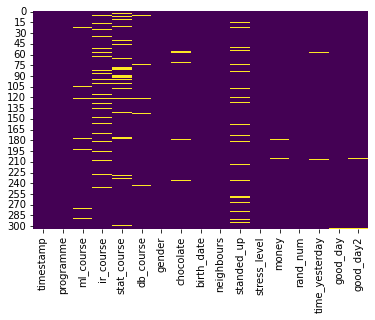

In [21]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis');

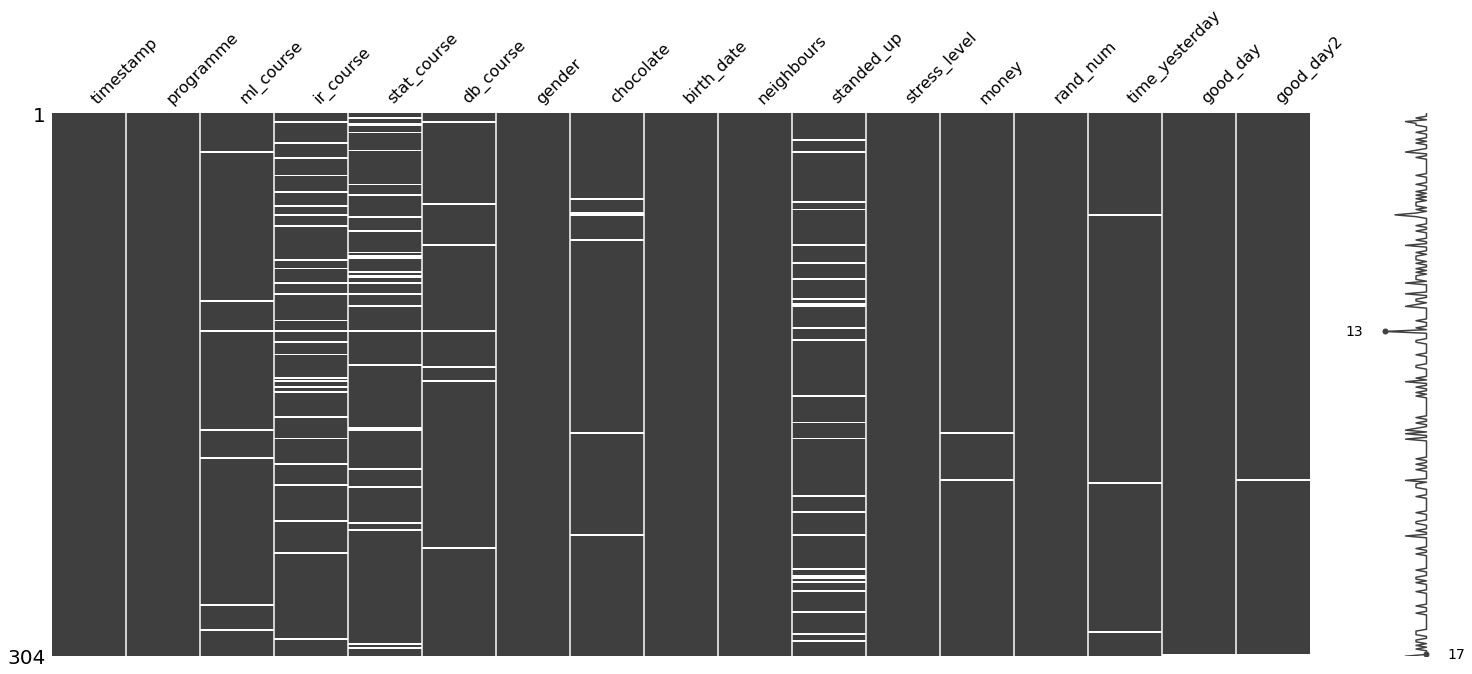

In [22]:
msno.matrix(df=data);

### Handling Missing Value

In [23]:
data.dropna().head(10)

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,1.0,female,neither,02.05.1998,0,0.0,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29-02-2000,0,1.0,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,1.0,1.0,1.0,0.0,male,fat,29-06-1998,1,0.0,0,100,9,x,0,0
4,4-5-2022 12:12:15,AI,1.0,1.0,1.0,0.0,male,fat,03-10-1997,0,0.0,2,100,86,07:20,Sunshine,Good Food
8,4-5-2022 12:12:29,FinTech,1.0,0.0,1.0,0.0,male,neither,1995,0,0.0,20,100 / the number of people,42,23:00,Food,Relaxation
9,4-5-2022 12:12:29,Artificial Intelligence,0.0,0.0,1.0,0.0,female,fat,21-07-2000,5,1.0,50,10,88,12 hours,"sun, friends and wine","relaxing, watching a show, hockey"
10,4-5-2022 12:12:31,Artificial Intelligence MsC,0.0,0.0,1.0,1.0,male,I have no idea what you are talking about,29-05-1998,0,0.0,60,1000,1,Banana,Coffee,Not coffee
12,4-5-2022 12:12:34,ai,1.0,1.0,1.0,0.0,male,I have no idea what you are talking about,0102,0,0.0,5000,100,7,to be?,drugs,beer
13,4-5-2022 12:12:36,programme?,0.0,0.0,1.0,1.0,male,fat,19/10/1982,0,1.0,65,100,8,00:00,Good sleep,Good work
14,4-5-2022 12:12:42,Masters in Artificial Intelligence,1.0,0.0,1.0,0.0,male,fat,22/02/1999,0,1.0,70,100,420,12:00,Good mental state.,A challenge.


### Handling Duplicate Records

In [24]:
duplicate = data.duplicated()
print(duplicate.sum()) # there is no duplicate data

0


### Correlation

In [25]:
data.corr()

,ml_course,ir_course,stat_course,db_course,standed_up
ml_course,1.000000,0.289754,0.055331,-0.208864,0.003147
ir_course,0.289754,1.000000,0.064373,-0.377607,-0.087102
stat_course,0.055331,0.064373,1.000000,-0.067132,-0.010364
db_course,-0.208864,-0.377607,-0.067132,1.000000,0.034677
standed_up,0.003147,-0.087102,-0.010364,0.034677,1.000000


### Data Cleaning

In [26]:
data['ml_course'] = data['ml_course'].apply(pd.to_numeric)
data['stat_course'] = data['stat_course'].apply(pd.to_numeric)
data['ir_course'] = data['ir_course'].apply(pd.to_numeric)
data['db_course'] = data['db_course'].apply(pd.to_numeric)
data['standed_up'] = data['standed_up'].apply(pd.to_numeric)

In [27]:
data.dtypes

timestamp          object
programme          object
ml_course         float64
ir_course         float64
stat_course       float64
db_course         float64
gender             object
chocolate          object
birth_date         object
neighbours         object
standed_up        float64
stress_level       object
money              object
rand_num           object
time_yesterday     object
good_day           object
good_day2          object
dtype: object

In [28]:
#pd.to_numeric(data["stress_level"], errors='coerce')
#data["stress_level"] = pd.to_numeric(data["stress_level"], errors='coerce')
#data["money"] = pd.to_numeric(data["money"], errors='coerce')
#data["rand_num"] = pd.to_numeric(data["rand_num"], errors='coerce')
#data["time_yesterday"] = pd.to_numeric(data["time_yesterday"], errors='coerce')
data["neighbours"] = pd.to_numeric(data["neighbours"], errors='coerce').astype('Int64')

## data["neighbours"]

In [29]:
data["neighbours"].unique()

<IntegerArray>
[     0,      1,      5,     -4,     11,      3,      2,     20,    666,
      7,     45,      4,      6,   <NA>,     -2,    250,    300,      8,
 978000,    128,     12,      9]
Length: 22, dtype: Int64

In [30]:
data['neighbours'][data['neighbours']<0] = 0
data['neighbours'][data['neighbours']>600] = 600

In [31]:
data["neighbours"].unique()

<IntegerArray>
[0, 1, 5, 11, 3, 2, 20, 600, 7, 45, 4, 6, <NA>, 250, 300, 8, 128, 12, 9]
Length: 19, dtype: Int64

In [32]:
tmp_data = data['neighbours'].dropna()
mean = int(np.mean(tmp_data))

data['neighbours'] = data['neighbours'].fillna(mean)
data['neighbours'].unique()

<IntegerArray>
[0, 1, 5, 11, 3, 2, 20, 600, 7, 45, 4, 6, 8, 250, 300, 128, 12, 9]
Length: 18, dtype: Int64

## data["rand_num"]

In [33]:
data["rand_num"].unique()

array(['888', '12', '9', '31', '86', '87', '6', '50', '42', '88', '1',
       '56', '7', '8', '420', '22', '17', '0', '800039995', '72', '27',
       '6.98', '11', '3.14', '32', '1278946', '651', '24', '2500', '-1',
       '1946', '36', '666', '765', '3', '81', '109', '4444', '94', '9999',
       '401', '19', '77', '69', '864687452', '280', '67', '2', '33',
       '8271', '4', '365', '5', '41', '73',
       '029384750928347509832475908347529803475982347598237459802374980572349805723489573298576893475983274598723498572349805738904759082345702345897349857',
       '980000000000000789', '432', '100', '10.3', '14', '3645',
       '987654321', 'Π', '227', '247', '57',
       '73553801531488322931570535984775796225797789', '94736253',
       '1947271047294720^10204847', '13', '97', '25', '567', '58', '23',
       '43', 'No', '21', '5813', '7823', '47', '76853', '7,66789E+13',
       '83', '60', 'omega', '10', '4.34', '68', '651893', '9462648',
       '521', '9664367943217790643378', '2230', 

In [34]:
data["rand_num"] = pd.to_numeric(data["rand_num"], errors='coerce').astype('float64')

data["rand_num"].unique()

array([ 8.88000000e+002,  1.20000000e+001,  9.00000000e+000,
        3.10000000e+001,  8.60000000e+001,  8.70000000e+001,
        6.00000000e+000,  5.00000000e+001,  4.20000000e+001,
        8.80000000e+001,  1.00000000e+000,  5.60000000e+001,
        7.00000000e+000,  8.00000000e+000,  4.20000000e+002,
        2.20000000e+001,  1.70000000e+001,  0.00000000e+000,
        8.00039995e+008,  7.20000000e+001,  2.70000000e+001,
        6.98000000e+000,  1.10000000e+001,  3.14000000e+000,
        3.20000000e+001,  1.27894600e+006,  6.51000000e+002,
        2.40000000e+001,  2.50000000e+003, -1.00000000e+000,
        1.94600000e+003,  3.60000000e+001,  6.66000000e+002,
        7.65000000e+002,  3.00000000e+000,  8.10000000e+001,
        1.09000000e+002,  4.44400000e+003,  9.40000000e+001,
        9.99900000e+003,  4.01000000e+002,  1.90000000e+001,
        7.70000000e+001,  6.90000000e+001,  8.64687452e+008,
        2.80000000e+002,  6.70000000e+001,  2.00000000e+000,
        3.30000000e+001,

In [35]:
tmp_data = data['rand_num'].dropna()
median = float(np.median(tmp_data))

data['rand_num'] = data['rand_num'].fillna(median)

In [36]:
print(sum(data['rand_num'].isna()))

0


In [37]:
data['rand_num'] = data['rand_num'].apply(Decimal)

In [38]:
data["rand_num"].head()

0    888
1     12
2      9
3     31
4     86
Name: rand_num, dtype: object

In [39]:
data["rand_num"].unique()

array([Decimal('888'), Decimal('12'), Decimal('9'), Decimal('31'),
       Decimal('86'), Decimal('87'), Decimal('6'), Decimal('50'),
       Decimal('42'), Decimal('88'), Decimal('1'), Decimal('56'),
       Decimal('7'), Decimal('8'), Decimal('420'), Decimal('22'),
       Decimal('17'), Decimal('0'), Decimal('800039995'), Decimal('72'),
       Decimal('27'),
       Decimal('6.980000000000000426325641456060111522674560546875'),
       Decimal('11'),
       Decimal('3.140000000000000124344978758017532527446746826171875'),
       Decimal('32'), Decimal('1278946'), Decimal('651'), Decimal('24'),
       Decimal('2500'), Decimal('-1'), Decimal('1946'), Decimal('36'),
       Decimal('666'), Decimal('765'), Decimal('3'), Decimal('81'),
       Decimal('109'), Decimal('4444'), Decimal('94'), Decimal('9999'),
       Decimal('401'), Decimal('19'), Decimal('77'), Decimal('69'),
       Decimal('864687452'), Decimal('280'), Decimal('67'), Decimal('2'),
       Decimal('33'), Decimal('8271'), Decimal('4

In [40]:
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,1.0,female,neither,02.05.1998,0,0.0,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29-02-2000,0,1.0,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,1.0,1.0,1.0,0.0,male,fat,29-06-1998,1,0.0,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,1.0,0.0,NaN,1.0,male,neither,11/05/97,0,0.0,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,1.0,1.0,1.0,0.0,male,fat,03-10-1997,0,0.0,2,100,86,07:20,Sunshine,Good Food


## data["money"]

In [41]:
data["money"].unique()

array(['5', '1', '100', '1000', '0.1', '10', '100 / the number of people',
       '87', '1/n', '0', 'at least 10', '5€', '55',
       'The price of Febo kroketje', '99', '30', '0,5', 'A lot', '20',
       '2', '1 cent', '200', '0.60', '77', '5 euros :))', 'Billion',
       '10 cents', '100/100', '80', '50 euros', '28052', '69',
       'An appropriate amount', '3.50', '(100/627)~0.157', 'a lot',
       'I prefer not holding competitions and receiving money everone',
       '1000000', '12', '1 million euros', '50', '500', '100000',
       'You don’t owe me anything ', '100/n', '70', '24.99', '100 euros',
       '7', '25', '10eur', '66', '69,69', 'I deserve everything', '0.6',
       '0.10', '0.16', 'What?', 'IDK', '0.15', '23', '35',
       '100/#people taking the course', '88', '0,00006',
       'At least half 😎', '0,16', '6', '0.50', '60', '0.16 ', nan,
       '10 euros', '6 cents', 'equal', '40', None,
       'If I win the the competition I feel like I deserve the total amount. Otherw

In [42]:
data['money'] = pd.to_numeric(data['money'], errors='coerce').astype(float)
sum(data['money'].isna())

55

In [43]:
data['money'][data['money'] < 0] = 0.0
data['money'][data['money'] > 100] = 100.0 # since the max given money is 100

tmp_data = data['money'].dropna()
mean = int(np.mean(tmp_data))

data['money'] = data['money'].fillna(mean)

In [44]:
sum(data['money'].isna())

0

In [45]:
data['money'].head()

0      5.0
1      1.0
2    100.0
3    100.0
4    100.0
Name: money, dtype: float64

## data['stress_level']

In [46]:
data['stress_level'].unique()

array(['0', '200', '20', '2', '48', '100', '50', '60', '5000', '65', '70',
       'over 9000', '98', '34', '15', '1000', '10', '90', '1', '56', '69',
       '79', '33', '80', '40', '45', '7', '101', '5', '88', '75', '99',
       '30', '999', '1E+22', '42', '61', '89', 'yes.', '150', 'Over 9000',
       '44', '3', 'Next question', '14', 'yes', '68', '22', '-69', '47',
       '36', '12', '85', '55', '23', '7.5', '11', '59', '25', '37', '102',
       '29', '72', '77', '32', '81', '-100', '19', '66', '87', '45.8',
       'Fifty', '38', 'private matters', '62', '9', '666'], dtype=object)

In [47]:
data['stress_level'] = pd.to_numeric(data['stress_level'], errors='coerce').astype(float)
sum(data['stress_level'].isna())

7

In [48]:
data['stress_level'][data['stress_level'] < 0] = 0  # since the min limit money is 0
data['stress_level'][data['stress_level'] > 100] = 100 # since the max limit is 100

tmp_data = data['stress_level'].dropna()
mean = int(np.mean(tmp_data))

data['stress_level'] = data['stress_level'].fillna(mean)
data["stress_level"] = data["stress_level"].astype(int)

In [49]:
data['stress_level'].unique()

array([  0, 100,  20,   2,  48,  50,  60,  65,  70,  98,  34,  15,  10,
        90,   1,  56,  69,  79,  33,  80,  40,  45,   7,   5,  88,  75,
        99,  30,  42,  61,  89,  44,   3,  14,  68,  22,  47,  36,  12,
        85,  55,  23,  11,  59,  25,  37,  29,  72,  77,  32,  81,  19,
        66,  87,  38,  62,   9])

## data['time_yesterday']

In [50]:
print(data['time_yesterday'].unique())

['23:00' '32' 'x' '14:00' '07:20' '2130' '00:35' '23' '12 hours' 'Banana'
 '00:00' 'to be?' '12:00' '4 years ago' 'noon' '12:55' '12' '20:00'
 'definitely 7' '03:00' 'Ja' '2.30AM' 'Yellow' '23:32' '?' '23.30' '12:30'
 '90' '5' 'What?' '01.30' '1:34' '09:00' 'midnight' 'huh' 'Yesterday' '11'
 '23:30' '1' '0200' 'Today' 'Haha' '4' '01:00' '10:00 pm' '23:45' '24'
 '12.00' 'Yes' nan '00:34' '13:15' '7' 'Gym' '2.00' '22:30' '15:30' 'yes'
 '11pm' '2 am' '2300' '0530 am' '13:12' '01.00' "4 o' clock" '4:35' '2:00'
 'Wot' '10:45' '20.09' '10' '22:00' '12:45' '6 am' '7 hours' '12.15' 'Ω'
 '9.00 am' 'I do not know' '10:00' '00:45' '11.30pm' '6' '10:21:39' '4:20'
 'idk' '00:55' 'today' '0100' '01:30' '21:20' '2am' '45' '3AM'
 'Dizzy Miss Lizzy was a terrible song to end Help! with' '02:20' '1.00'
 '23:40' '05:00' '1am' '00' '20.30' '2:30' '11:30' '11:45' '00:40' '00:15'
 '7:00' '00:07' '23pm' '4:15' '4am' '01:53' '0:00' '1 am' '23:15' '00.20'
 '0:15h' '4.30' '12 am' '2230' '06:00' '21:43' '23.45' 

In [51]:
data['time_yesterday'] = pd.to_numeric(data['time_yesterday'], errors='coerce').astype(float)
data['time_yesterday'].unique()

tmp_data = data['time_yesterday'].dropna()
mean = int(np.mean(tmp_data))
data['time_yesterday'] = data['time_yesterday'].fillna(mean)

In [52]:
data['time_yesterday'].unique()

array([1.540e+02, 3.200e+01, 2.130e+03, 2.300e+01, 1.200e+01, 2.330e+01,
       9.000e+01, 5.000e+00, 1.300e+00, 1.100e+01, 1.000e+00, 2.000e+02,
       4.000e+00, 2.400e+01, 7.000e+00, 2.000e+00, 2.300e+03, 2.009e+01,
       1.000e+01, 1.215e+01, 6.000e+00, 1.000e+02, 4.500e+01, 0.000e+00,
       2.030e+01, 2.000e-01, 4.300e+00, 2.230e+03, 2.345e+01, 2.230e+01,
       1.230e+01, 2.334e+01, 3.000e+00, 1.500e+01, 2.200e+01, 9.000e+00,
       2.350e+03, 1.120e+01, 2.300e+00, 5.550e+02])

In [53]:
data['date'] = ["2022-04-05"] * len(data['time_yesterday'])
#data['date'] = data['date'] + pd.to_timedelta(data['time_yesterday'], unit='h',errors='coerce')
data['date'] =pd.to_timedelta(data['time_yesterday'], unit='h',errors='coerce')
data['date']
#data['date'] = pd.concat([data['date'], data['time_yesterday']], axis=1)

0      6 days 10:00:00
1      1 days 08:00:00
2      6 days 10:00:00
3      6 days 10:00:00
4      6 days 10:00:00
            ...       
299    0 days 05:00:00
300    0 days 09:00:00
301   23 days 03:00:00
302    0 days 00:00:00
303    6 days 10:00:00
Name: date, Length: 304, dtype: timedelta64[ns]

In [54]:
data['time_yesterday'] = data['date'].apply(
    lambda x: f'{x.components.hours:02d}:{x.components.minutes:02d}:{x.components.seconds:02d}'
              if not pd.isnull(x) else ''
)

In [55]:
data['time_yesterday'].unique()

array(['10:00:00', '08:00:00', '18:00:00', '23:00:00', '12:00:00',
       '23:18:00', '05:00:00', '01:18:00', '11:00:00', '01:00:00',
       '04:00:00', '00:00:00', '07:00:00', '02:00:00', '20:00:00',
       '20:05:24', '12:09:00', '06:00:00', '21:00:00', '20:18:00',
       '00:12:00', '04:18:00', '22:00:00', '23:27:00', '22:18:00',
       '12:18:00', '23:20:24', '03:00:00', '15:00:00', '09:00:00',
       '11:12:00', '02:18:00'], dtype=object)

In [56]:
data['time_yesterday'][30:40]

30    10:00:00
31    18:00:00
32    23:00:00
33    05:00:00
34    05:00:00
35    10:00:00
36    10:00:00
37    01:18:00
38    10:00:00
39    10:00:00
Name: time_yesterday, dtype: object

In [57]:
data = data.drop(["date"],axis=1)
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,1.0,female,neither,02.05.1998,0,0.0,0,5.0,888,10:00:00,coffee,sun
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29-02-2000,0,1.0,100,1.0,12,08:00:00,7777,8964
2,4-5-2022 12:12:09,Computational Science,1.0,1.0,1.0,0.0,male,fat,29-06-1998,1,0.0,0,100.0,9,10:00:00,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,1.0,0.0,NaN,1.0,male,neither,11/05/97,0,0.0,20,100.0,31,10:00:00,good food,no stress
4,4-5-2022 12:12:15,AI,1.0,1.0,1.0,0.0,male,fat,03-10-1997,0,0.0,2,100.0,86,10:00:00,Sunshine,Good Food


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       304 non-null    object 
 1   programme       304 non-null    object 
 2   ml_course       297 non-null    float64
 3   ir_course       277 non-null    float64
 4   stat_course     276 non-null    float64
 5   db_course       297 non-null    float64
 6   gender          304 non-null    object 
 7   chocolate       298 non-null    object 
 8   birth_date      304 non-null    object 
 9   neighbours      304 non-null    Int64  
 10  standed_up      278 non-null    float64
 11  stress_level    304 non-null    int32  
 12  money           304 non-null    float64
 13  rand_num        304 non-null    object 
 14  time_yesterday  304 non-null    object 
 15  good_day        303 non-null    object 
 16  good_day2       302 non-null    object 
dtypes: Int64(1), float64(6), int32(1), 

## data['birth_date']

In [59]:
#data['birth_date'].unique()

In [60]:
for i in range(0,len(data['birth_date'])):
    data['birth_date'][i] = data['birth_date'][i].translate ({ord(c): "/" for c in "!@#$%^&*()[]{};:,.<>?\|`~-=_+"})

data['birth_date'].unique()

array(['02/05/1998', '29/02/2000', '29/06/1998', '11/05/97', '03/10/1997',
       '28', '15/10/98', '17 November', '1995', '21/07/2000',
       '29/05/1998', '05/03', '0102', '19/10/1982', '22/02/1999', '23/7',
       'august', '11/11/1999', '22/04/1994', '30/01/1997', '1999/08/23',
       '10/07/1998', '03/11/1995', '08/05/1998', 'Ah', '30/03/1998',
       '01/09/1998', '07/09/1997', '02/07/1997', '19/06/1998', '26/08/97',
       '1999', '1/1/1900', '01/04/2022', '14/05/1996', 'March 9/ 1995',
       '2/18', '02/11/1996', '02/10/1998', '09/06/1998', '12 july',
       '27/06/1998', '/600 BC', '10/06/1998', '30/08/1997', '01/01',
       '09/04/1997', 'January 1 1997', '22/07/1992', '03/04/2000',
       '07/09/1999', '30/08/1999', '15/03/2000', '24/06/1998',
       '15/02/1974', '24/9', '4', '19/10/1998', '13/07', '19/02/1998',
       '08/08/1997', '23 December ', '28/07/1997',
       'fifteenth of december nineteenhundredninetyfive', '19971205',
       '01/01/2001', 'december 9th', '199

In [61]:
data['birth_date'] = pd.to_datetime(data['birth_date'],format='%d/%m/%Y', errors='coerce')
data['birth_date'] = data['birth_date'].dt.strftime('%d/%m/%Y')
data['birth_date'].unique()

array(['02/05/1998', '29/02/2000', '29/06/1998', nan, '03/10/1997',
       '21/07/2000', '29/05/1998', '19/10/1982', '22/02/1999',
       '11/11/1999', '22/04/1994', '30/01/1997', '10/07/1998',
       '03/11/1995', '08/05/1998', '30/03/1998', '01/09/1998',
       '07/09/1997', '02/07/1997', '19/06/1998', '01/01/1900',
       '01/04/2022', '14/05/1996', '02/11/1996', '02/10/1998',
       '09/06/1998', '27/06/1998', '10/06/1998', '30/08/1997',
       '09/04/1997', '22/07/1992', '03/04/2000', '07/09/1999',
       '30/08/1999', '15/03/2000', '24/06/1998', '15/02/1974',
       '19/10/1998', '19/02/1998', '08/08/1997', '28/07/1997',
       '01/01/2001', '12/09/1999', '06/12/1994', '20/08/1999',
       '06/12/1997', '10/07/1995', '06/09/1997', '03/03/1997',
       '25/04/2001', '20/11/1998', '20/03/1998', '19/05/1996',
       '02/11/1896', '13/02/2001', '04/04/1999', '31/05/2000',
       '27/03/1998', '04/08/1998', '08/06/1999', '01/12/1982',
       '21/10/2000', '25/10/1998', '08/03/1999', '

In [62]:
data['year'] = pd.DatetimeIndex(data['birth_date']).year

In [63]:
age_list = []
for i in range(len(data['year'])):
    age_list.append((2022 - data["year"].iloc[i]).astype(int))
    
data["age"] = age_list

In [64]:
data["age"].unique()

array([         24,          22, -2147483648,          25,          40,
                23,          28,          27,         122,           0,
                26,          30,          48,          21,         126,
                31,          18,          29,          19,          32,
                66])

In [65]:
data['age'][data['age'] == -2147483648] = np.nan
data['age'][data['age'] == 122] = np.nan
data['age'][data['age'] == 126] = np.nan

tmp_data = data['age'].dropna()
mean = int(np.mean(tmp_data))

data['age'] = data['age'].fillna(mean)

In [66]:
print(sum(data['birth_date'].isna()))
print(sum(data['age'].isna()))
data["age"] = data["age"].astype(int)
data.drop("year",axis=1,inplace=True)

126
0


In [67]:
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2,age
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,1.0,female,neither,02/05/1998,0,0.0,0,5.0,888,10:00:00,coffee,sun,24
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29/02/2000,0,1.0,100,1.0,12,08:00:00,7777,8964,22
2,4-5-2022 12:12:09,Computational Science,1.0,1.0,1.0,0.0,male,fat,29/06/1998,1,0.0,0,100.0,9,10:00:00,0,0,24
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,1.0,0.0,NaN,1.0,male,neither,NaN,0,0.0,20,100.0,31,10:00:00,good food,no stress,24
4,4-5-2022 12:12:15,AI,1.0,1.0,1.0,0.0,male,fat,03/10/1997,0,0.0,2,100.0,86,10:00:00,Sunshine,Good Food,25


In [68]:
data.groupby('age')['stress_level'].agg(['min', 'max']).sort_values(['min'])

,min,max
age,,
0,0,90
27,0,100
25,0,100
24,0,100
26,0,99
23,3,100
22,5,100
28,10,99
32,10,10


In [69]:
data.groupby('gender')['stress_level'].agg(['min', 'max']).sort_values(['min'])

,min,max
gender,,
female,0,100
gender fluid,0,100
male,0,100
not willing to answer,3,100
intersex,34,34


## data["programme"]

In [70]:
data["programme"].unique()

array(['artificial intelligence', 'big data', 'Computational  Science',
       'Bioinformatics and Systems Biology', 'AI',
       'Artificial Intelligence', 'Artificial Intelligence ',
       'M Artificial Intelligence', 'FinTech',
       'Artificial Intelligence MsC', 'Business analytics', 'ai',
       'programme?', 'Masters in Artificial Intelligence',
       'Msc. Information Studies Data Science Track UVA ',
       'Econometrics and Operational Research', 'Finance and Technology',
       'Computer science', 'Business Analytics', 'Computational Science',
       'chrome', 'MSc Mathematics', 'Econometrics', 'AI for health',
       'Data Mining techniques', 'computer scienece', 'Msc AI @ UvA',
       'Econometrics & Operations Research',
       'Master Artificial Intelligence', 'Artificial intelligence ',
       'Data Science', 'MSc Econometrics & Operations Research',
       'Computational science', 'MSc AI',
       'Bioinformatics and systems biology msc', 'CS', 'Bioinformatics',
   

In [71]:
data["programme"] = data["programme"].str.lower()
data["programme"][data["programme"] == "ai"] = "artificial intelligence"
data["programme"][data["programme"] == "masters in artificial intelligence"] = "artificial intelligence"
data["programme"][data["programme"] == "artificial intelligence msc"] = "artificial intelligence"
data["programme"][data["programme"] == "msc ai @ uva"] = "artificial intelligence"
data["programme"][data["programme"] == "artificial intelligence "] = "artificial intelligence"
data["programme"][data["programme"] == "msc ai"] = "artificial intelligence"
data["programme"][data["programme"] == "master artificial intelligence"] = "artificial intelligence"
data["programme"][data["programme"] == "masters ai "] = "artificial intelligence"
data["programme"][data["programme"] == "master artificial intelligence"] = "artificial intelligence"
data["programme"][data["programme"] == "artificial intelligence master"] = "artificial intelligence"
data["programme"][data["programme"] == "master artificial intelligence at uva"] = "artificial intelligence"
data["programme"][data["programme"] == "msc artificial intelligence"] = "artificial intelligence"
data["programme"][data["programme"] == "artificial intelligence master"] = "artificial intelligence"
data["programme"][data["programme"] == "msc in ai"] = "artificial intelligence"
data["programme"][data["programme"] == "m artificial intelligence "] = "artificial intelligence"
data["programme"][data["programme"] == "master ai"] = "artificial intelligence"
data["programme"][data["programme"] == "ai for health"] = "artificial intelligence"
data["programme"][data["programme"] == "msc. ai at uva "] = "artificial intelligence"
data["programme"][data["programme"] == "ai"] = "artificial intelligence"
data["programme"][data["programme"] == "vu master of ai"] = "artificial intelligence"
data["programme"][data["programme"] == "artificial intelligence - cognitive science"] = "artificial intelligence"
data["programme"][data["programme"] == "ai cognitive science track"] = "artificial intelligence"
data["programme"][data["programme"] == "masters in artificial intelligence "] = "artificial intelligence"
data["programme"][data["programme"] == "vu master of ai"] = "artificial intelligence"
data["programme"][data["programme"] == "ai masters"] = "artificial intelligence"
data["programme"][data["programme"] == "ai "] = "artificial intelligence"

data["programme"][data["programme"] == "computational  science"] = "computational science"
data["programme"][data["programme"] == "msc computational science "] = "computational science"
data["programme"][data["programme"] == "computational science "] = "computational science"
data["programme"][data["programme"] == "computational science(cls)"] = "computational science"
data["programme"][data["programme"] == "msc computational science"] = "computational science"

data["programme"][data["programme"] == "qrm"] = "quantitative risk management"
data["programme"][data["programme"] == "duisenberg honours programme in quantitative risk management"] = "quantitative risk management"

data["programme"][data["programme"] == "bioinformatics & systems biology"] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "msc in bioinformatics and systems biology"] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "bisb"] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "bio informatics and systems biology"] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "msc bioinformatics"] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "bioinformatics"] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "msc bioinformatics and systems biology "] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "msc bioinformatics and systems biology"] = "bioinformatics and systems biology"
data["programme"][data["programme"] == "masters bioinformatics "] = "bioinformatics and systems biology"

data["programme"][data["programme"] == "econometrics & operations research"] = "econometrics and operational research"
data["programme"][data["programme"] == "econometrics"] = "econometrics"
data["programme"][data["programme"] == "msc econometrics"] = "econometrics"
data["programme"][data["programme"] == "economtrics"] = "econometrics"
data["programme"][data["programme"] == "eor"] = "econometrics"
data["programme"][data["programme"] == "masters eor"] = "econometrics"

data["programme"][data["programme"] == "masters computer science "] = "computer science"
data["programme"][data["programme"] == "msc computer science"] = "computer science"
data["programme"][data["programme"] == "cs"] = "computer science"
data["programme"][data["programme"] == "computer science(joint degree)"] = "computer science"
data["programme"][data["programme"] == "computer science - bde"] = "computer science"
data["programme"][data["programme"] == "computer scienece"] = "computer science"
data["programme"][data["programme"] == "computer science "] = "computer science" 
data["programme"][data["programme"] == "master of computer science"] = "computer science"

data["programme"][data["programme"] == "business analytics master (computational intelligence track)"] = "business analytics"
data["programme"][data["programme"] == "ba"] = "business analytics"
data["programme"][data["programme"] == "business analytics "] = "business analytics"

data["programme"][data["programme"] == "msc finance"] = "finance"
data["programme"][data["programme"] == "mpa"] = "management policy analysis and entrepreneurship"

data["programme"][data["programme"] == "data mining techniques"] = "data mining"

In [72]:
programme_dict = {}
value = 0

for i in range(0,len(data["programme"])):
    if data["programme"].iloc[i] not in programme_dict:
        value = 1
        programme_dict.update({data["programme"].iloc[i]:value})
    if data["programme"].iloc[i] in programme_dict:
        value += 1
        programme_dict.update({data["programme"].iloc[i]:value})
               
print(programme_dict)

{'artificial intelligence': 4, 'big data': 12, 'computational science': 3, 'bioinformatics and systems biology': 6, 'm artificial intelligence': 2, 'fintech': 2, 'business analytics': 5, 'programme?': 2, 'msc. information studies data science track uva ': 2, 'econometrics and operational research': 9, 'finance and technology': 2, 'computer science': 3, 'chrome': 2, 'msc mathematics': 2, 'econometrics': 9, 'data mining': 15, 'data science': 2, 'msc econometrics & operations research': 2, 'bioinformatics and systems biology msc': 2, 'data mining tekkers ': 2, 'bioinformatics ': 5, 'econometrics and operations research': 12, 'master of computer science ': 2, 'quantitative risk management': 5, 'medical natural sciences': 2, 'management policy analysis and entrepreneurship': 3, 'none': 2, 'human language technology': 6, 'cheese': 2, 'econometrics and data science': 10, 'pdcs': 2, 'seg': 2, 'advanced': 2, 'phd': 9, 'is:ds': 2, 'finance': 2, 'data science ': 2, 'engineering and policy analysi

## data["good_day"]

In [73]:
data["good_day"].unique()

array(['coffee', '7777', '0', 'good food', 'Sunshine', 'This lecture',
       'sunshine', 'Rainy Day', 'Food', 'sun, friends and wine', 'Coffee',
       'sun', 'drugs', 'Good sleep', 'Good mental state.', '6', 'food',
       'Having a fun lecture', 'Flat white', 'Friends', 'Happy',
       'See you smile', 'Having my favorite meal :)', 'Head',
       'A good balance between productivity and rest', 'Movies',
       'Good food', 'Sunnnn', 'alcohol', 'Datamining', 'Weather', 'Sex',
       '1', 'Working hard', 'Beer', 'good night of sleep', 'Good weather',
       'Saturday', 'Seeing Friends', 'Satisfaction', '2', 'Chocolate',
       'Yes', 'Snacks', 'With family and loved ones', 'Sun', 'Cookies',
       'Biking ', 'waking up early', 'Gym', 'whole lotta bread', '420',
       'Having a snickers ', 'Free food', 'sleep', 'alive',
       'No deadlines/exam', 'waking up ', 'Good food and sports',
       'being stoic', 'game', 'Kissing thomas', 'Joy', 'Reading', 'Cake',
       'No lectures ', 'Fro

In [74]:
nlp = spacy.load("en_core_web_sm")

In [75]:
def generate_word_cloud(text):
    
    stop_words = nlp.Defaults.stop_words
    
    wordcloud = WordCloud(stopwords=stop_words,background_color='white',collocation_threshold=3)
    wordcloud.generate(text)
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud,interpolation='bilinear')
    return plt.show()

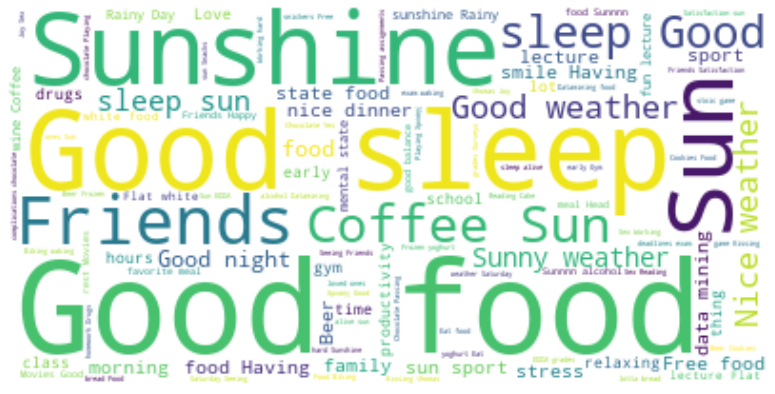

In [76]:
goodday_words = data["good_day"]
text = " ".join(word for word in goodday_words.astype(str))

generate_word_cloud(text)

## data["good_day2"]

In [77]:
data["good_day2"].unique()

array(['sun', '8964', '0', 'no stress', 'Good Food', 'Sun', 'happiness',
       'Weekend', 'Relaxation', 'relaxing, watching a show, hockey',
       'Not coffee', 'holiday', 'beer', 'Good work', 'A challenge.', '9',
       'sleeping', 'Hanging out with my friends', 'tv series',
       'good food', 'wind:(', 'Water', 'Faces', 'Monk',
       'Getting enough sleep', 'Good weather', 'A good night of sleep',
       'Coffee', 'Croissant', 'relax', 'Datamining2', 'sleep', 'Beer',
       'Good food', '1', 'Playing volleyball', 'Friends', 'Ajax',
       'Nice people around', 'Saturday', 'Nice weather', 'Spare time',
       '4', 'beach', 'Clear skies', 'No', 'gym', 'Good grades',
       'Being in good health', 'Sleep', 'More beer', "I don't know ",
       'Food', 'Books', 'finishing things for the day', 'good wave check',
       'Good coffee', '69', 'Free coffee', 'Chocolate Milk', 'eat',
       'awake', 'not rain', 'Good sex', 'eating', '10',
       'accepting change', 'beautiful girl', 'Alcoho

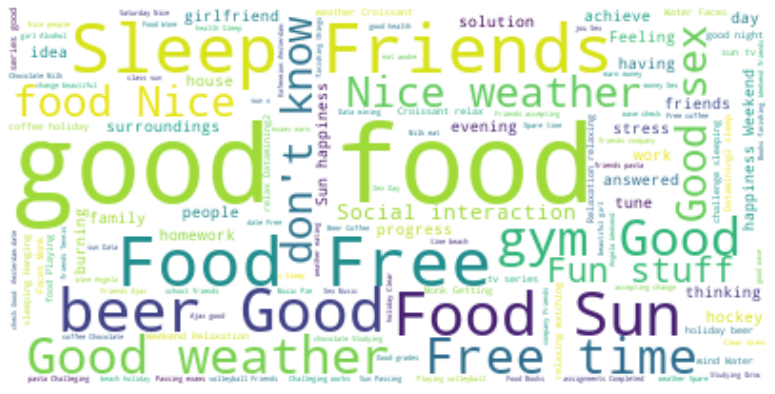

In [78]:
goodday2_words = data["good_day2"]
text2 = " ".join(word for word in goodday2_words.astype(str))

generate_word_cloud(text2)

In [79]:
data.isnull().sum()

timestamp           0
programme           0
ml_course           7
ir_course          27
stat_course        28
db_course           7
gender              0
chocolate           6
birth_date        126
neighbours          0
standed_up         26
stress_level        0
money               0
rand_num            0
time_yesterday      0
good_day            1
good_day2           2
age                 0
dtype: int64

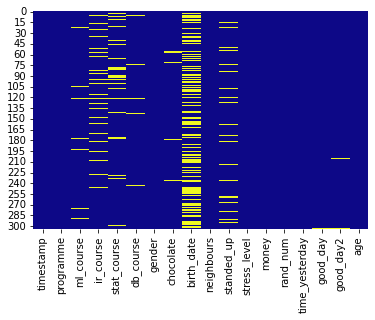

In [80]:
sns.heatmap(data.isnull(),cbar=False,cmap='plasma');

In [81]:
#data.dropna().head()

### Normalizing and Scaling

In [82]:
std_scale = StandardScaler()
std_scale

StandardScaler()

In [83]:
data['stress_level'] = std_scale.fit_transform(data[['stress_level']])
data['money'] = std_scale.fit_transform(data[['money']])
data['rand_num'] = std_scale.fit_transform(data[['rand_num']])

In [84]:
data = data.dropna()
data.head()

,timestamp,programme,ml_course,ir_course,stat_course,db_course,gender,chocolate,birth_date,neighbours,standed_up,stress_level,money,rand_num,time_yesterday,good_day,good_day2,age
0,4-5-2022 12:12:07,artificial intelligence,1.0,0.0,1.0,1.0,female,neither,02/05/1998,0,0.0,-1.521432,-1.009845,-0.057448,10:00:00,coffee,sun,24
1,4-5-2022 12:12:07,big data,1.0,0.0,1.0,1.0,male,fat,29/02/2000,0,1.0,1.646265,-1.114049,-0.057448,08:00:00,7777,8964,22
2,4-5-2022 12:12:09,computational science,1.0,1.0,1.0,0.0,male,fat,29/06/1998,1,0.0,-1.521432,1.464992,-0.057448,10:00:00,0,0,24
4,4-5-2022 12:12:15,artificial intelligence,1.0,1.0,1.0,0.0,male,fat,03/10/1997,0,0.0,-1.458078,1.464992,-0.057448,10:00:00,Sunshine,Good Food,25
9,4-5-2022 12:12:29,artificial intelligence,0.0,0.0,1.0,0.0,female,fat,21/07/2000,5,1.0,0.062416,-0.879590,-0.057448,10:00:00,"sun, friends and wine","relaxing, watching a show, hockey",22


In [85]:
data.describe()

,ml_course,ir_course,stat_course,db_course,neighbours,standed_up,stress_level,money,rand_num,age
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000
mean,0.593750,0.257812,0.875000,0.453125,4.257812,0.132812,0.053754,-0.075313,-5.744850e-02,24.468750
std,0.493062,0.439149,0.332018,0.499754,26.760897,0.340705,0.982478,0.978452,2.089848e-17,4.433121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.521432,-1.140100,-5.744850e-02,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.840377,-1.009845,-5.744850e-02,23.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.062416,-0.058986,-5.744850e-02,24.000000
75%,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.695956,0.716028,-5.744850e-02,25.250000
max,1.000000,1.000000,1.000000,1.000000,300.000000,1.000000,1.646265,1.464992,-5.744850e-02,48.000000


## Data Visualization

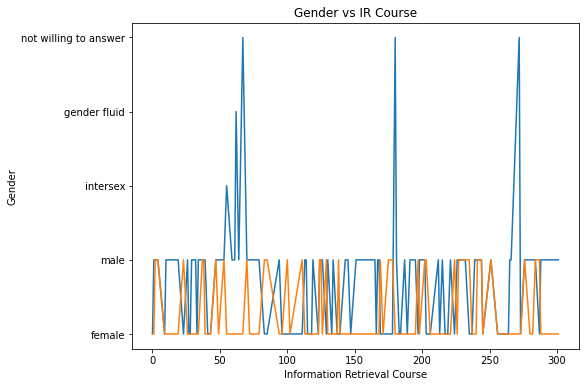

In [86]:
# scatter plot
plt.figure(figsize=(8,6))
plt.plot(data['gender'])
plt.plot(data['ir_course'])
  
# adding title to the plot
plt.title("Gender vs IR Course")
  
# setting the X and Y labels
plt.xlabel('Information Retrieval Course')
plt.ylabel('Gender');

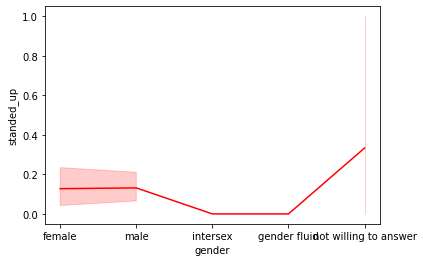

In [87]:
sns.lineplot(x="gender", y="standed_up", data=data,color="red");

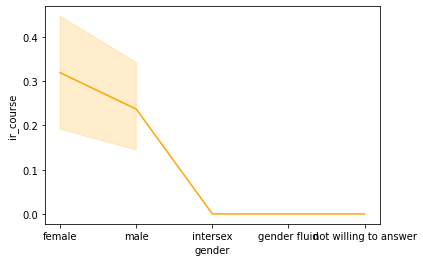

In [88]:
sns.lineplot(x="gender", y="ir_course", data=data,color="orange");

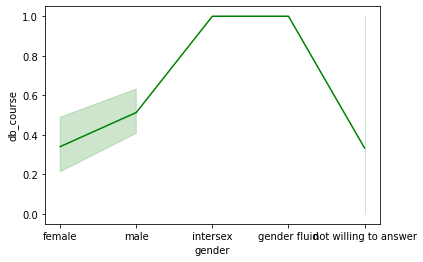

In [89]:
sns.lineplot(x="gender", y="db_course", data=data,color="green");

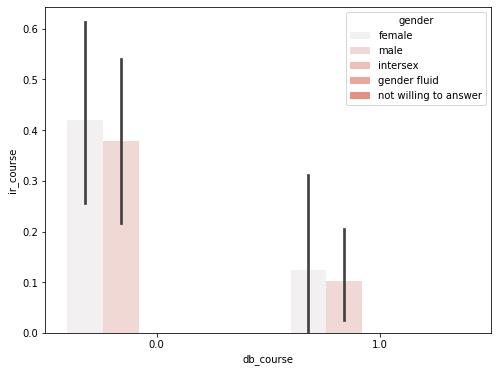

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(x='db_course',y='ir_course', data=data, hue='gender',color="salmon");

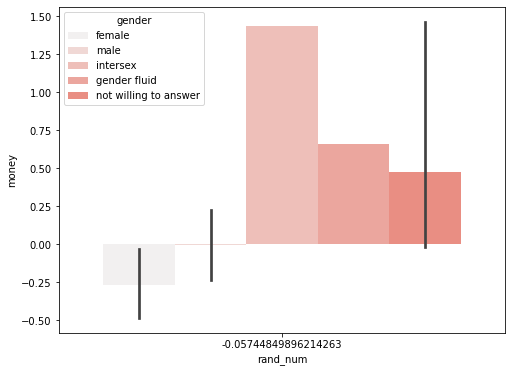

In [91]:
plt.figure(figsize=(8,6))
sns.barplot(x='rand_num',y='money', data=data, hue='gender',color="salmon");

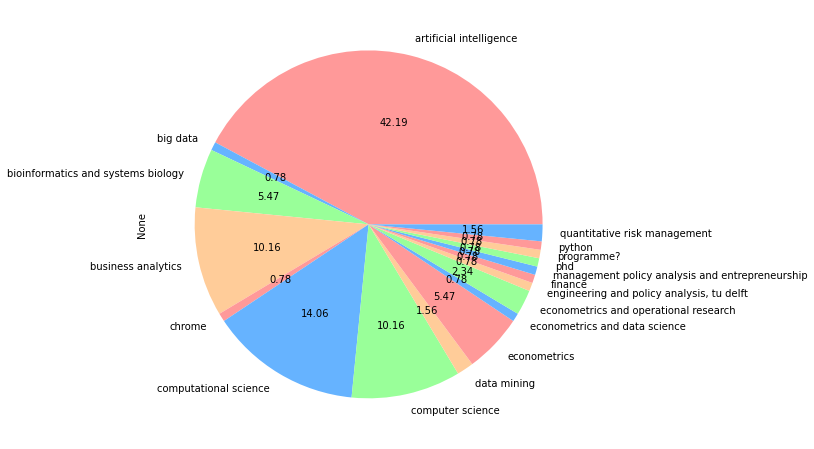

In [92]:
plt.figure(figsize=(10,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data.groupby('programme').size().plot(kind='pie', autopct='%.2f',colors=colors)
plt.show()

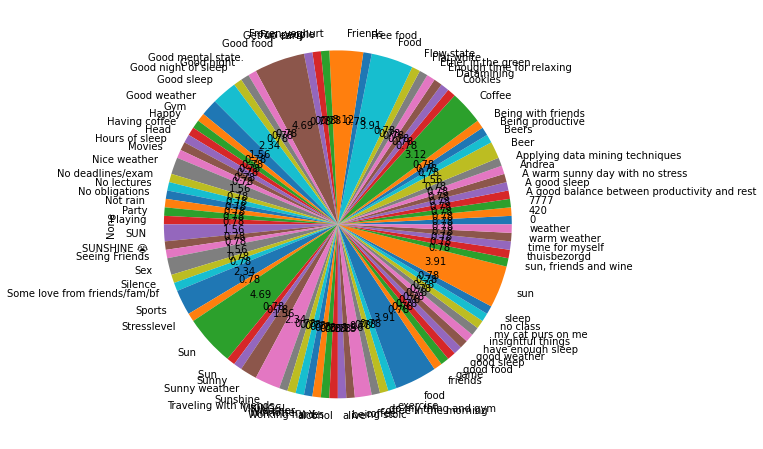

In [93]:
plt.figure(figsize=(10,8))
data.groupby('good_day').size().plot(kind='pie', autopct='%.2f')
plt.show()